# **ML 1 Linear Regression**

### Importing Libraries

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Reading the dataset

In [ ]:
dataset = pd.read_csv('austin_weather.csv')
dataset.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
dataset.shape

(1319, 21)

In [ ]:
dataset.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


## TempLowF and TempHighF - Simple Linear Regression

### Data Visualization

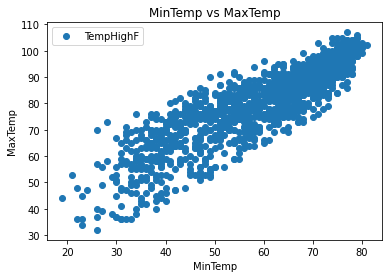

In [ ]:
dataset.plot(x='TempLowF', y='TempHighF', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

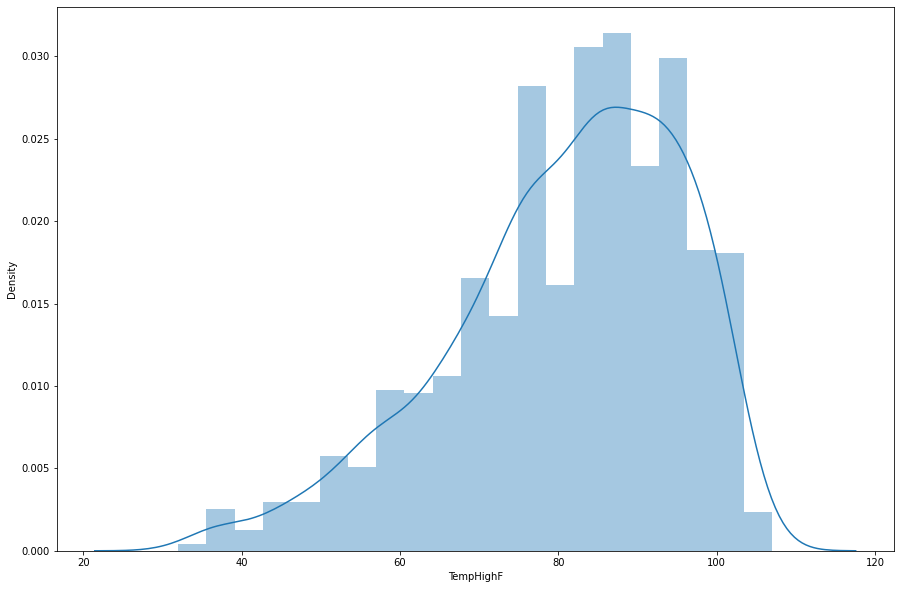

In [ ]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['TempHighF'])

### Data Split

In [ ]:
X = dataset['TempLowF'].values.reshape(-1,1)
y = dataset['TempHighF'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
y_test[0]

array([90])

### Linear Regression

In [ ]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[26.34801274]
[[0.9096167]]


### Model Evaluation

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,90,87.292332
1,62,70.919231
2,79,70.919231
3,95,90.930799
4,83,88.201949
...,...,...
259,92,91.840415
260,96,91.840415
261,102,97.298116
262,77,71.828848


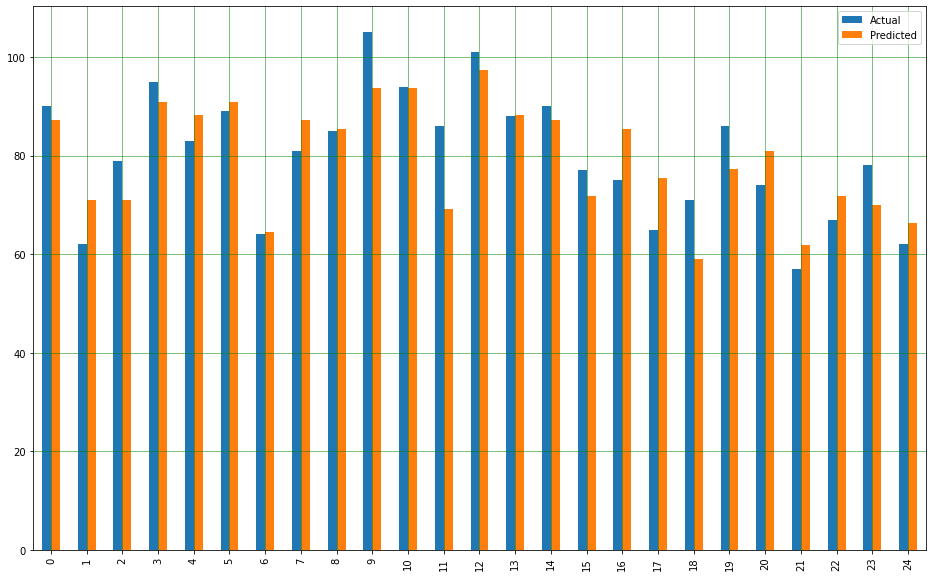

In [ ]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

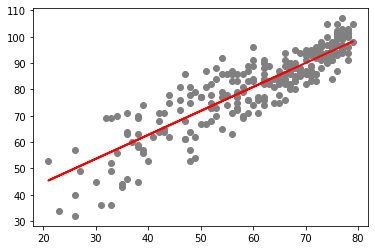

In [ ]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Metrics


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 score = ' + str(r2_score(y_test, y_pred)))

Mean Absolute Error: 5.254477197701091
Mean Squared Error: 45.35992956125359
Root Mean Squared Error: 6.734978066872496
R2 score = 0.7962215485174373


## Precipitation Prediction - Multiple Linear Regression

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### Reading the data and analyzing

In [4]:
data = pd.read_csv("austin_weather.csv")
data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [5]:
data.dtypes

Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

In [6]:
print(data['DewPointHighF'].unique())

['67' '43' '31' '36' '44' '39' '41' '49' '51' '37' '55' '54' '15' '29'
 '60' '64' '58' '28' '42' '22' '38' '45' '19' '59' '62' '40' '17' '53'
 '34' '48' '52' '61' '63' '33' '57' '65' '46' '32' '50' '27' '56' '47'
 '68' '69' '66' '70' '73' '71' '76' '72' '75' '74' '-' '77' '23' '35' '30'
 '79' '78' '80' '26' '18' '25' '13']


### Data Preprocessing

Data type conversion and replacing non numeric values with ''

In [7]:
data['DewPointHighF'] = data['DewPointHighF'].str.replace('-','')
data['DewPointAvgF'] = data['DewPointAvgF'].str.replace('-','')
data['DewPointLowF'] = data['DewPointLowF'].str.replace('-','')
data['HumidityHighPercent'] = data['HumidityHighPercent'].str.replace('-','')
data['HumidityAvgPercent'] = data['HumidityAvgPercent'].str.replace('-','')
data['HumidityLowPercent'] = data['HumidityLowPercent'].str.replace('-','')
data['SeaLevelPressureHighInches'] = data['SeaLevelPressureHighInches'].str.replace('-','')
data['SeaLevelPressureAvgInches'] = data['SeaLevelPressureAvgInches'].str.replace('-','')
data['SeaLevelPressureLowInches'] = data['SeaLevelPressureLowInches'].str.replace('-','')
data['VisibilityHighMiles'] = data['VisibilityHighMiles'].str.replace('-','')
data['VisibilityAvgMiles'] = data['VisibilityAvgMiles'].str.replace('-','')
data['VisibilityLowMiles'] = data['VisibilityLowMiles'].str.replace('-','')
data['WindHighMPH'] = data['WindHighMPH'].str.replace('-','')
data['WindAvgMPH'] = data['WindAvgMPH'].str.replace('-','')
data['WindGustMPH'] = data['WindGustMPH'].str.replace('-','')
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].str.replace('T','')

#Changing the Column data type to the required Data type.

data['DewPointHighF'] = pd.to_numeric(data['DewPointHighF'])
data['DewPointAvgF'] = pd.to_numeric(data['DewPointAvgF'])
data['DewPointLowF'] = pd.to_numeric(data['DewPointLowF'])
data['HumidityHighPercent'] = pd.to_numeric(data['HumidityHighPercent'])
data['HumidityAvgPercent'] = pd.to_numeric(data['HumidityAvgPercent'])
data['HumidityLowPercent'] = pd.to_numeric(data['HumidityLowPercent'])
data['SeaLevelPressureHighInches'] = pd.to_numeric(data['SeaLevelPressureHighInches'])
data['SeaLevelPressureAvgInches'] = pd.to_numeric(data['SeaLevelPressureAvgInches'])
data['SeaLevelPressureLowInches'] = pd.to_numeric(data['SeaLevelPressureLowInches'])
data['VisibilityHighMiles'] = pd.to_numeric(data['VisibilityHighMiles'])
data['VisibilityAvgMiles'] = pd.to_numeric(data['VisibilityAvgMiles'])
data['VisibilityLowMiles'] = pd.to_numeric(data['VisibilityLowMiles'])
data['WindHighMPH'] = pd.to_numeric(data['WindHighMPH'])
data['WindAvgMPH'] = pd.to_numeric(data['WindAvgMPH'])
data['WindGustMPH'] = pd.to_numeric(data['WindGustMPH'])
data['PrecipitationSumInches'] = pd.to_numeric(data['PrecipitationSumInches'])

In [8]:
data.isnull().sum()

Date                            0
TempHighF                       0
TempAvgF                        0
TempLowF                        0
DewPointHighF                   7
DewPointAvgF                    7
DewPointLowF                    7
HumidityHighPercent             2
HumidityAvgPercent              2
HumidityLowPercent              2
SeaLevelPressureHighInches      3
SeaLevelPressureAvgInches       3
SeaLevelPressureLowInches       3
VisibilityHighMiles            12
VisibilityAvgMiles             12
VisibilityLowMiles             12
WindHighMPH                     2
WindAvgMPH                      2
WindGustMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

Dropping Null values

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [10]:
data.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
count,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000,1183.000000
mean,80.952663,70.528318,59.601014,61.310228,56.384615,50.678783,87.739645,66.272189,44.295858,30.111412,30.022096,29.931175,9.990702,9.139476,6.808115,13.191040,4.975486,21.300085,0.127380
std,14.841901,14.142399,14.343669,13.719980,14.984651,16.281365,11.193643,12.744009,17.279440,0.180415,0.172844,0.172662,0.171826,1.477979,3.756263,3.436249,2.069088,5.878959,0.450287
min,32.000000,29.000000,19.000000,13.000000,8.000000,2.000000,37.000000,27.000000,10.000000,29.630000,29.550000,29.410000,5.000000,2.000000,0.000000,6.000000,1.000000,9.000000,0.000000
25%,72.000000,61.000000,49.000000,52.000000,46.000000,38.000000,84.000000,59.000000,31.000000,29.990000,29.910000,29.820000,10.000000,9.000000,2.000000,10.000000,3.000000,17.000000,0.000000
50%,83.000000,73.000000,62.000000,66.000000,61.000000,55.000000,90.000000,66.000000,42.000000,30.080000,30.000000,29.910000,10.000000,10.000000,9.000000,13.000000,5.000000,21.000000,0.000000
75%,93.000000,83.000000,73.000000,73.000000,69.000000,65.000000,94.000000,74.000000,54.000000,30.210000,30.100000,30.020000,10.000000,10.000000,10.000000,15.000000,6.000000,25.000000,0.010000
max,107.000000,93.000000,81.000000,80.000000,76.000000,75.000000,100.000000,97.000000,93.000000,30.830000,30.740000,30.610000,10.000000,10.000000,10.000000,29.000000,12.000000,57.000000,5.200000


In [11]:
data.dtypes

Date                           object
TempHighF                       int64
TempAvgF                        int64
TempLowF                        int64
DewPointHighF                 float64
DewPointAvgF                  float64
DewPointLowF                  float64
HumidityHighPercent           float64
HumidityAvgPercent            float64
HumidityLowPercent            float64
SeaLevelPressureHighInches    float64
SeaLevelPressureAvgInches     float64
SeaLevelPressureLowInches     float64
VisibilityHighMiles           float64
VisibilityAvgMiles            float64
VisibilityLowMiles            float64
WindHighMPH                   float64
WindAvgMPH                    float64
WindGustMPH                   float64
PrecipitationSumInches        float64
Events                         object
dtype: object

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

In [13]:
data.dtypes

Date                          datetime64[ns]
TempHighF                              int64
TempAvgF                               int64
TempLowF                               int64
DewPointHighF                        float64
DewPointAvgF                         float64
DewPointLowF                         float64
HumidityHighPercent                  float64
HumidityAvgPercent                   float64
HumidityLowPercent                   float64
SeaLevelPressureHighInches           float64
SeaLevelPressureAvgInches            float64
SeaLevelPressureLowInches            float64
VisibilityHighMiles                  float64
VisibilityAvgMiles                   float64
VisibilityLowMiles                   float64
WindHighMPH                          float64
WindAvgMPH                           float64
WindGustMPH                          float64
PrecipitationSumInches               float64
Events                                object
dtype: object

In [14]:
# Date column can be split to Year and Month as this will make the dataset more robust and help in the analysis

In [15]:
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month

In [16]:
data.drop(columns='Date',inplace=True)

### Exploratory Data Analysis

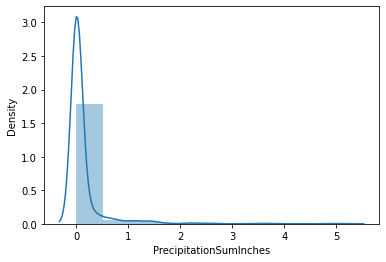

In [17]:
sns.distplot(data['PrecipitationSumInches'],bins=10)

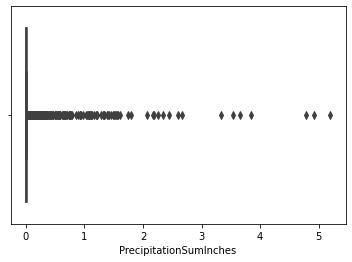

In [18]:
sns.boxplot(data['PrecipitationSumInches'])

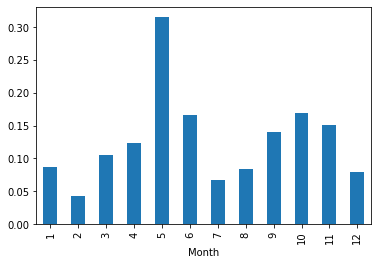

In [19]:
data.groupby('Month').mean()['PrecipitationSumInches'].plot(kind='bar')

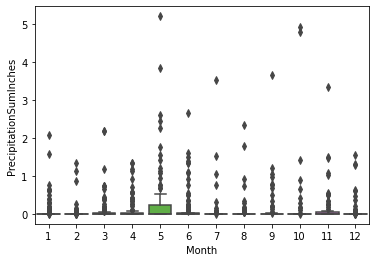

In [20]:
sns.boxplot(data['Month'],data['PrecipitationSumInches'])

In [21]:
data['TempAvgF'].dtype
num_col = [i for i in data.columns if data[i].dtype == 'int64' or data[i].dtype == 'float64']

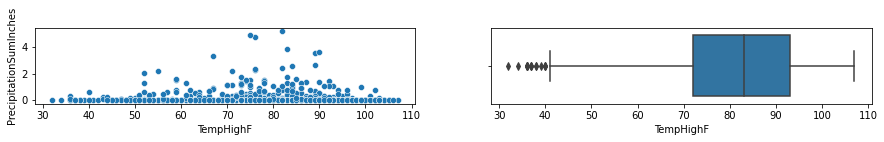

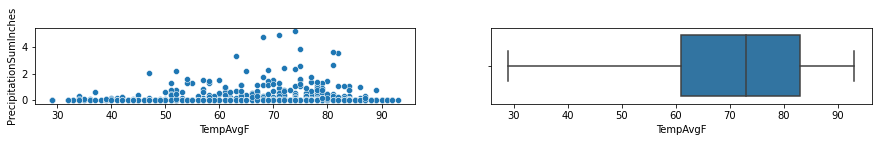

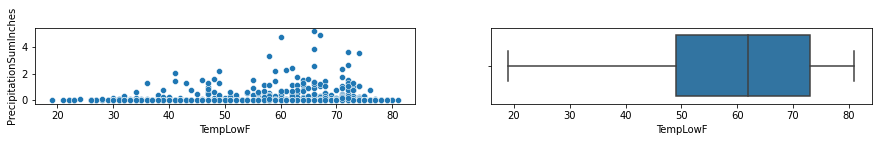

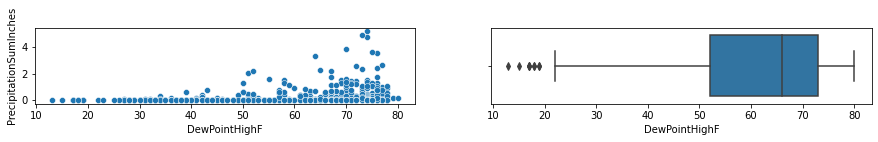

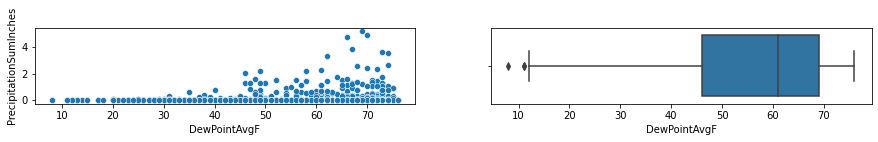

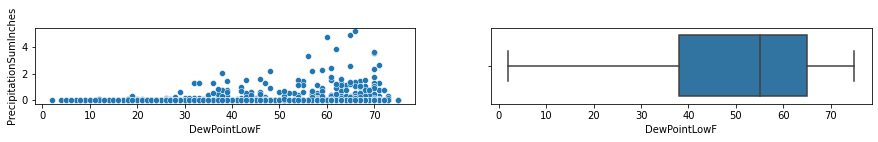

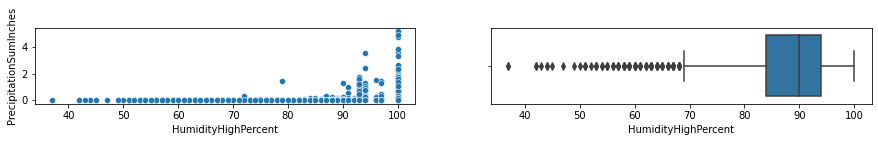

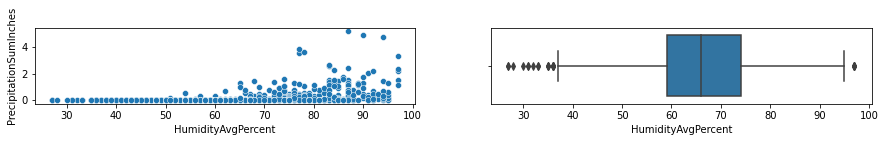

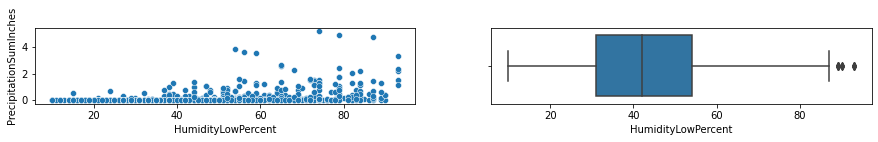

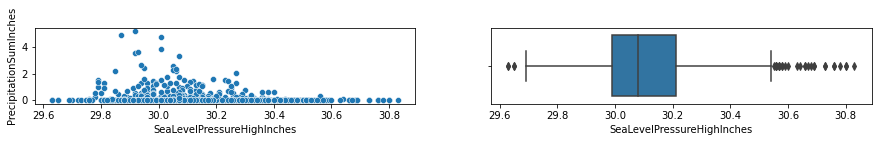

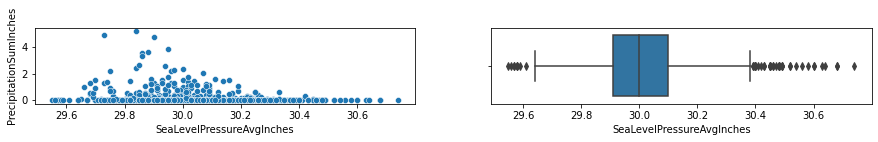

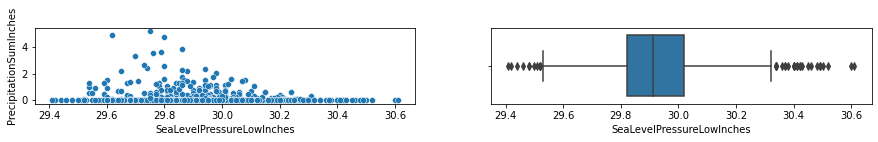

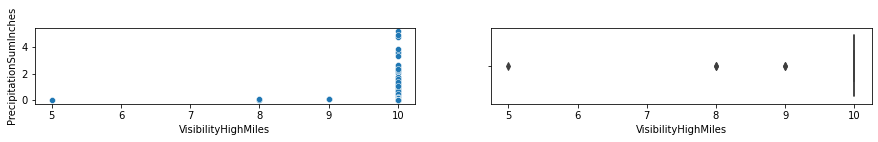

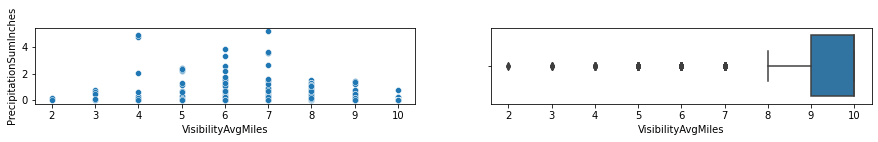

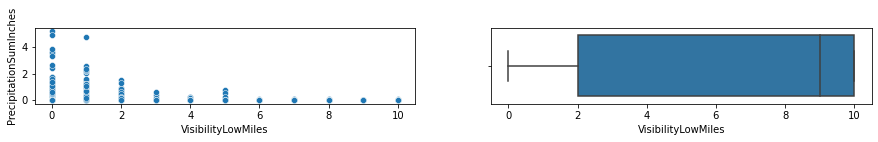

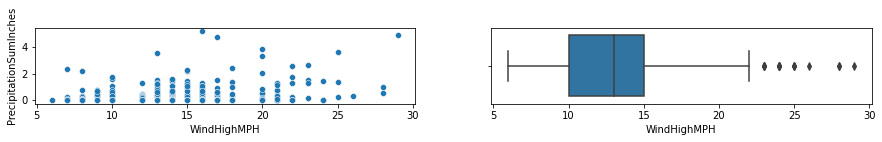

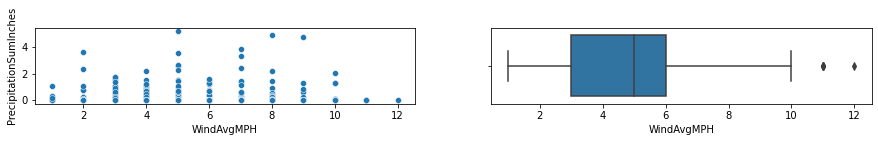

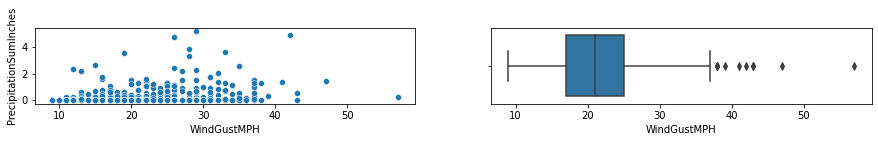

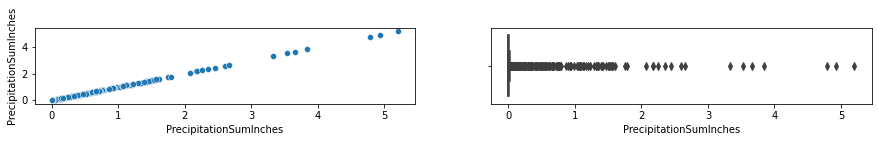

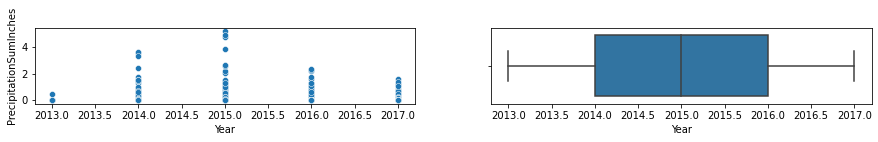

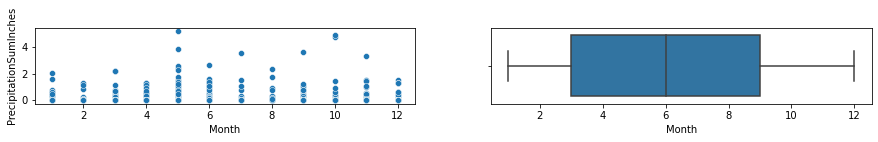

In [22]:
c = 1
for i in num_col:
    plt.figure(figsize=(15,35))
    plt.subplot(21,2,c)
    sns.scatterplot(data[i],data['PrecipitationSumInches'])
    c = c+1
    plt.subplot(21,2,c)
    sns.boxplot(data[i])
    c=c+1

In [23]:
# data = pd.get_dummies(data,columns=['Events'])
data2 = data[['TempAvgF','DewPointAvgF','HumidityAvgPercent','SeaLevelPressureAvgInches','VisibilityAvgMiles','WindAvgMPH','PrecipitationSumInches','Events','Year','Month']]

In [24]:
x = data.drop(columns=['PrecipitationSumInches','Events','Year'])
y = data['PrecipitationSumInches']

In [25]:
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std = pd.DataFrame(x_std,columns=x.columns)

In [26]:
x_std.describe()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,Month
count,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03,1.183000e+03
mean,-2.188538e-16,-2.227954e-16,2.562053e-16,1.346251e-16,-2.501052e-17,1.576648e-17,-6.944759e-16,2.049643e-16,8.033397e-17,-1.915107e-14,8.752180e-15,1.575874e-15,3.471383e-15,-7.196272e-16,-3.459241e-16,-1.138847e-16,2.737549e-16,-1.601518e-16,5.213262e-17
std,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00,1.000423e+00
min,-3.299669e+00,-2.937683e+00,-2.831785e+00,-3.522648e+00,-3.230311e+00,-2.991111e+00,-4.534815e+00,-3.082923e+00,-1.985618e+00,-2.669481e+00,-2.732503e+00,-3.019742e+00,-2.905731e+01,-4.832610e+00,-1.813237e+00,-2.093586e+00,-1.922184e+00,-2.093106e+00,-1.511634e+00
25%,-6.034570e-01,-6.740262e-01,-7.393853e-01,-6.788760e-01,-6.933099e-01,-7.790590e-01,-3.342278e-01,-5.708772e-01,-7.697866e-01,-6.732410e-01,-6.488159e-01,-6.441595e-01,5.413795e-02,-9.440926e-02,-1.280568e+00,-9.290333e-01,-9.551656e-01,-7.317457e-01,-9.248374e-01
50%,1.380014e-01,1.748450e-01,1.673212e-01,3.419652e-01,3.081377e-01,2.655210e-01,2.020174e-01,-2.136725e-02,-1.329226e-01,-1.741811e-01,-1.278942e-01,-1.226900e-01,5.413795e-02,5.824765e-01,5.837749e-01,-5.561895e-02,1.185272e-02,-5.106541e-02,-4.464219e-02
75%,8.120545e-01,8.822376e-01,9.345344e-01,8.523858e-01,8.422432e-01,8.799799e-01,5.595142e-01,6.066442e-01,5.618380e-01,5.466831e-01,4.509077e-01,5.146615e-01,5.413795e-02,5.824765e-01,8.501095e-01,5.266573e-01,4.953619e-01,6.296149e-01,8.355530e-01
max,1.755729e+00,1.589630e+00,1.492508e+00,1.362806e+00,1.309585e+00,1.494439e+00,1.095759e+00,2.412177e+00,2.819810e+00,3.984651e+00,4.155240e+00,3.933183e+00,5.413795e-02,5.824765e-01,8.501095e-01,4.602591e+00,3.396417e+00,6.075058e+00,1.715748e+00


### Data Modelling

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
y_test.values

array([0.36, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.93, 0.02, 0.  ,
       0.  , 0.  , 0.01, 3.66, 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.09,
       0.  , 0.  , 0.  , 1.22, 0.  , 0.  , 0.  , 0.16, 0.  , 0.  , 0.  ,
       0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 2.45, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.03, 0.  , 0.  , 0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.02, 0.  , 0.  , 0.  , 0.02, 0.01, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.86,
       0.61, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.26, 0.  , 0.  , 0.15,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.19, 0.  ,
       0.  , 1.75, 0.92, 0.  , 0.  , 0.73, 0.  , 0.03, 0.01, 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 2.17, 0.  , 0.  , 1.39, 0.  , 0.27, 1.

In [29]:
reg_model = LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [30]:
y_predicted = reg_model.predict(x_test)

In [31]:
day_index = 1035
days = [i for i in range(y_test.size)]

In [32]:
y_test

894     0.36
1266    0.00
1167    0.00
92      0.00
1035    0.00
        ... 
156     1.56
469     0.00
909     0.00
252     0.00
1071    0.00
Name: PrecipitationSumInches, Length: 237, dtype: float64

In [33]:
day_index = 156
days = [i for i in range(y_test.size)]

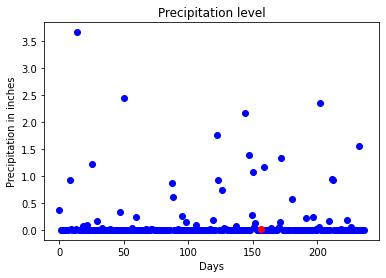

In [34]:
plt.scatter(days, y_test.values, color='b')
plt.scatter(days[day_index], y.values[day_index], color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

# Plot a graph of precipitation levels vs n# of days
plt.show()

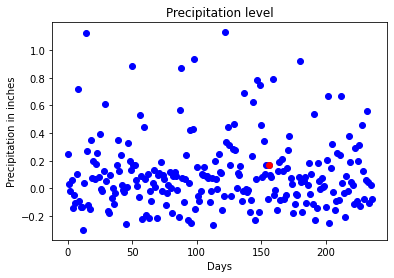

In [35]:
plt.scatter(days, y_predicted, color='b')
plt.scatter(days[day_index], y_predicted[day_index], color='r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

# Plot a graph of precipitation levels vs n# of days
plt.show()

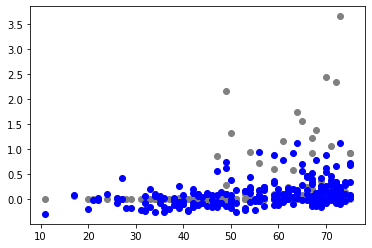

In [53]:
plt.scatter(x_test['DewPointAvgF'], y_test,  color='gray')
plt.scatter(x_test['DewPointAvgF'], y_predicted, c='b')
plt.show()

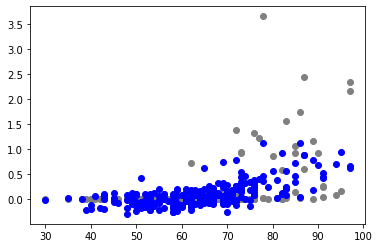

In [56]:
plt.scatter(x_test['HumidityAvgPercent'], y_test,  color='gray')
plt.scatter(x_test['HumidityAvgPercent'], y_predicted, c='b')
plt.show()

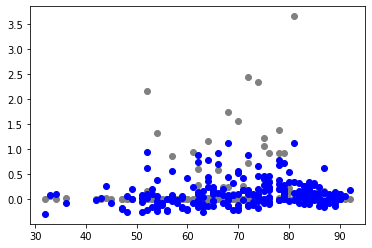

In [51]:
plt.scatter(x_test['TempAvgF'], y_test,  color='gray')
plt.scatter(x_test['TempAvgF'], y_predicted, c='b')
plt.show()

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

Mean absolute error = 0.1839913871359751
Mean squared error = 0.1094704438546489
R2 score = 0.424537122493852
